In [8]:
#Titanic Dataset Practice Exercises
# Load the Titanic Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first 5 rows
df.head()

#Numpy Practice Questions
#A.1)
age_array=np.array(df["Age"].dropna())
mean_age=np.mean(age_array)
median_age=np.median(age_array)
std_age=np.std(age_array)

print("Mean age :",mean_age)
print("Median age :",median_age)
print("Standard deviation :",std_age)

#A 2
valid_ages = df[(df["Age"] >= 1) & (df["Age"] <= 80)]["Age"]
rand_ages=np.random.choice(valid_ages,size=10,replace=True)
print(rand_ages)

#A 3
ageind=df[df["Age"]>60].index
print("Index positions where age > 60 :",ageind)

#a4
age_mean = df["Age"].mean()

df["Age_filled"] = np.where(df["Age"].isna(), age_mean, df["Age"])

print(df["Age_filled"].head())

#A5
age_array = np.array(df["Age_filled"])
fare_array = np.array(df["Fare"])

data_2d = np.column_stack((age_array, fare_array))

correlation_matrix = np.corrcoef(data_2d[:, 0], data_2d[:, 1])

print("Correlation matrix:\n", correlation_matrix)
print("Correlation between Age and Fare:", correlation_matrix[0, 1])


Mean age : 29.69911764705882
Median age : 28.0
Standard deviation : 14.516321150817316
[24. 21. 24. 23. 36. 29. 22. 41. 51. 21.]
Index positions where age > 60 : Index([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 438, 456, 483, 493, 545,
       555, 570, 625, 630, 672, 745, 829, 851],
      dtype='int64')
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age_filled, dtype: float64
Correlation matrix:
 [[1.         0.09156609]
 [0.09156609 1.        ]]
Correlation between Age and Fare: 0.09156609328505762


In [12]:
#Pandas Basics
# B.6
print("First 10 rows:")
print(df.head(10))

print("\nLast 10 rows:")
print(df.tail(10))

# B.7
print("Shape of dataset:", df.shape)

print("\nSummary statistics:")
print(df.describe())

#B.8
print("Number of passengers Survived and did not die :")
survival_count = df["Survived"].value_counts()
print(survival_count)

# B.9
print("the average age of passengers for each passenger class :")
avg_age_pclass = df.groupby("Pclass")["Age"].mean()
print(avg_age_pclass)

# B.10
print("Top 5 highest fares paid and corresponding passenger names :")
top_fares = df.sort_values(by="Fare", ascending=False).head(5)

print(top_fares[["Name", "Fare"]])


First 10 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timoth

In [17]:
#Data Cleaning and missing values
# C.11
print("Check for missing values in each column :")
missing_values = df.isnull().sum()
print(missing_values)

# C.12
print("Fill missing values in the Embarked column with the most frequent value (mode)")
most_frequent_embarked = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(most_frequent_embarked)
print(df["Embarked"].value_counts())

# C.13
#print("Drop the Cabin column entirely :")
#df.drop(columns=["Cabin"], inplace=True)
#print(df.columns)

# C.14
print("Replace missing Age values with the median age :")
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)
print(df["Age"].isnull().sum())

# C.15
print("Replace zero or negative Fare values with the mean fare :")
mean_fare = df[df["Fare"] > 0]["Fare"].mean()
df.loc[df["Fare"] <= 0, "Fare"] = mean_fare
print(df[df["Fare"] <= 0])


Check for missing values in each column :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age_filled       0
dtype: int64
Fill missing values in the Embarked column with the most frequent value (mode)
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Replace missing Age values with the median age :
0
Replace zero or negative Fare values with the mean fare :
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Age_filled]
Index: []


In [18]:
#Encoding and transformation
# D.16
print("Encode the Sex column into binary form")
df["Sex_encoded"] = df["Sex"].map({"male": 0, "female": 1})
print(df[["Sex", "Sex_encoded"]].head())

# D.17
print("One-Hot Encode the Embarked column :")
embarked_dummies = pd.get_dummies(df["Embarked"], prefix="Embarked")
df = pd.concat([df, embarked_dummies], axis=1)
print(embarked_dummies.head())

# D.18
print("Normalize the Fare column using Min-Max Scaling :")
df["Fare_normalized"] = (df["Fare"] - df["Fare"].min()) / (df["Fare"].max() - df["Fare"].min())
print(df["Fare_normalized"].head())

# D.19
print("Create a new column: FamilySize = SibSp + Parch + 1 :")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
print(df[["SibSp", "Parch", "FamilySize"]].head())




Encode the Sex column into binary form
      Sex  Sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0
One-Hot Encode the Embarked column :
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True
Normalize the Fare column using Min-Max Scaling :
0    0.006369
1    0.132340
2    0.007697
3    0.096569
4    0.007943
Name: Fare_normalized, dtype: float64
Create a new column: FamilySize = SibSp + Parch + 1 :
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


Plot a histogram of the Age column :


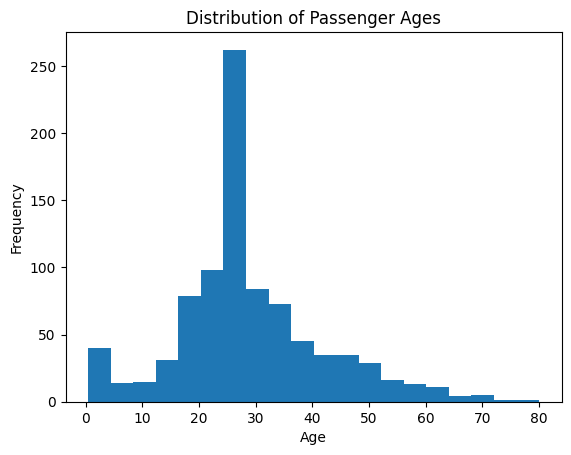

Bar chart showing number of passengers in each Pclass


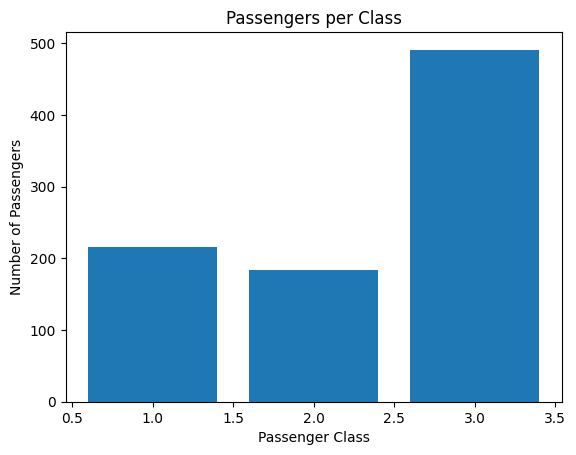

Line chart showing Fare trend by PassengerId


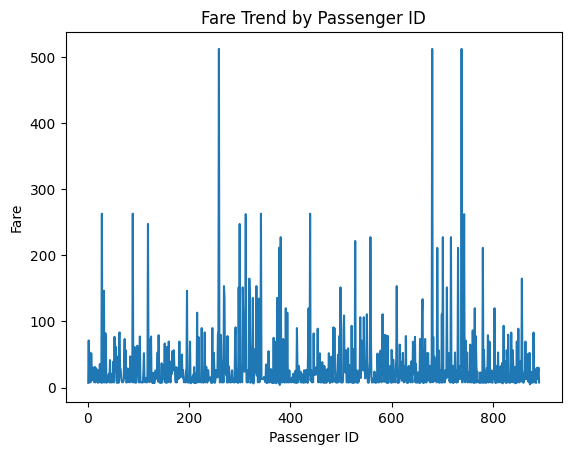

Scatter plot of Fare vs Age


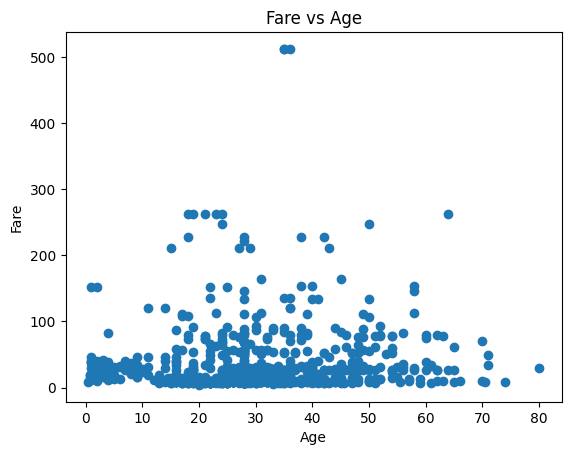

In [25]:
#Data Visualization with Matplotlib
# E.20
import matplotlib.pyplot as plt
print("Plot a histogram of the Age column :")
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Ages")
plt.show()

# E.21
print("Bar chart showing number of passengers in each Pclass")
pclass_counts = df["Pclass"].value_counts().sort_index()
plt.bar(pclass_counts.index, pclass_counts.values)
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passengers per Class")
plt.show()

# E.22
print("Line chart showing Fare trend by PassengerId")
plt.plot(df["PassengerId"], df["Fare"])
plt.xlabel("Passenger ID")
plt.ylabel("Fare")
plt.title("Fare Trend by Passenger ID")
plt.show()

# E.23
print("Scatter plot of Fare vs Age")
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age")
plt.show()


Create a count plot os passengers by sex


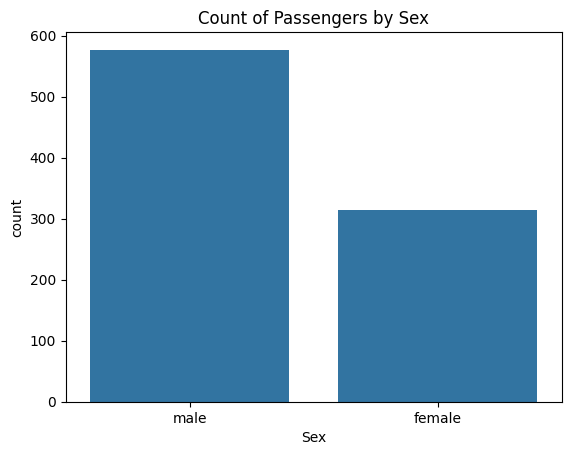

Box plot showing distribution of Age for each Pclass


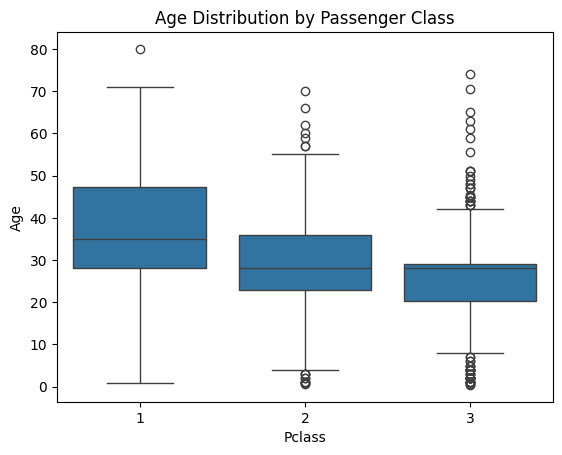

Heatmap to visualize correlations among numeric columns:


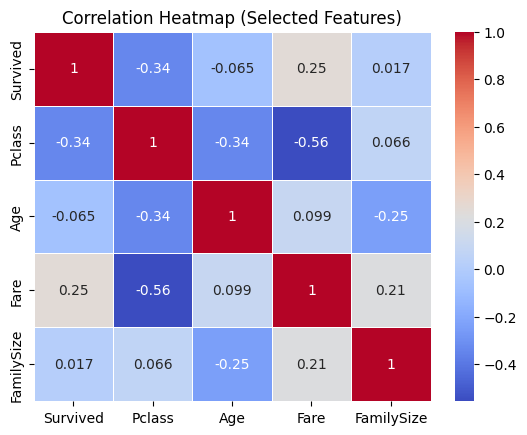

Violin plot of Fare vs Survived :


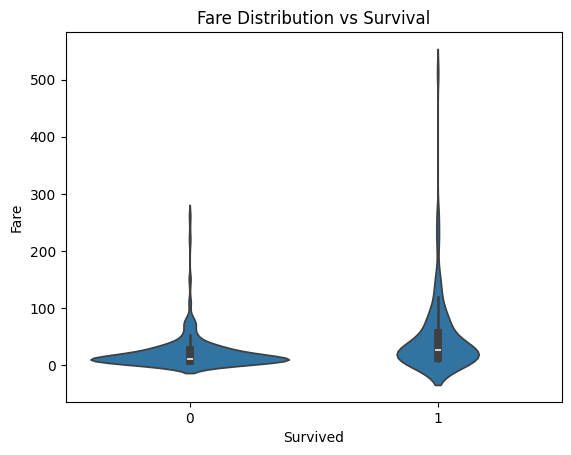

In [28]:
#Data Visualization with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# F.24
print("Create a count plot os passengers by sex")
sns.countplot(x="Sex", data=df)
plt.title("Count of Passengers by Sex")
plt.show()

#F.25
print("Box plot showing distribution of Age for each Pclass")
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

# F.26
print("Heatmap to visualize correlations among numeric columns:")
selected_cols = ["Survived", "Pclass", "Age", "Fare", "FamilySize"]
corr = df[selected_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


# F.27
print("Violin plot of Fare vs Survived :")
sns.violinplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution vs Survival")
plt.show()
